<a href="https://colab.research.google.com/github/AISaturdaysLagos/Cohort8-Elnadi/blob/main/Flood_chat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving all_data.csv to all_data.csv


In [ ]:
flood_df = pd.read_csv('all_data.csv')

In [ ]:
flood_df.head()

,Unnamed: 0,Year,Disaster Subtype,Country,Continent,Location,River Basin,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Start Date,End Date
0,0,1927,Flash Flood,Algeria,Africa,Mostaganem,None,1927,11.0,1,1927,11.0,1,3000,12,45400,15900,45400,11/1/1927,11/1/1927
1,1,1952,Flash Flood,Algeria,Africa,Not Recorded,None,1952,9.0,2,1952,9.0,2,25,12,45400,15900,45400,9/2/1952,9/2/1952
2,2,1954,Riverine flood,Egypt,Africa,Not Recorded,None,1954,3.0,4,1954,3.0,4,36,12,45400,15900,45400,3/4/1954,3/4/1954
3,3,1963,Flash Flood,Algeria,Africa,Southern,None,1963,12.0,5,1963,12.0,5,46,12,45400,15900,45400,12/5/1963,12/5/1963
4,4,1966,Flash Flood,Algeria,Africa,West El-Asnam,None,1966,10.0,6,1966,10.0,6,57,12,20000,15900,35912,10/6/1966,10/6/1966


In [ ]:
flood_df = flood_df.drop('Unnamed: 0', axis=1)

In [ ]:
flood_df.isna().sum()

Year                0
Disaster Subtype    0
Country             0
Continent           0
Location            0
River Basin         0
Start Year          0
Start Month         0
Start Day           0
End Year            0
End Month           0
End Day             0
Total Deaths        0
No Injured          0
No Affected         0
No Homeless         0
Total Affected      0
Start Date          0
End Date            0
dtype: int64

In [ ]:
flood_df.dtypes

Year                  int64
Disaster Subtype     object
Country              object
Continent            object
Location             object
River Basin          object
Start Year            int64
Start Month         float64
Start Day             int64
End Year              int64
End Month           float64
End Day               int64
Total Deaths          int64
No Injured            int64
No Affected           int64
No Homeless           int64
Total Affected        int64
Start Date           object
End Date             object
dtype: object

In [ ]:
flood_df['Start Date'] = pd.to_datetime(flood_df['Start Date'])
flood_df['End Date'] = pd.to_datetime(flood_df['End Date'])

In [ ]:
flood_df.describe()

,Year,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected
count,3383.000000,3383.000000,3383.000000,3383.000000,3383.000000,3383.000000,3383.000000,3383.000000,3383.000000,3.383000e+03,3383.000000,3.383000e+03
mean,2004.853680,2004.852793,6.603311,14.622820,2004.875850,6.735146,15.855158,38.013302,361.918416,1.015521e+05,25588.707360,9.197008e+04
std,12.255227,12.254601,3.301732,8.551834,12.264697,3.314381,8.493449,125.962784,1805.369994,3.230881e+05,71196.353002,3.256403e+05
min,1927.000000,1927.000000,1.000000,1.000000,1927.000000,1.000000,1.000000,1.000000,1.000000,7.000000e+01,50.000000,4.000000e+00
25%,2000.000000,2000.000000,4.000000,8.000000,2000.000000,4.000000,9.000000,6.000000,15.000000,5.000000e+03,1976.500000,3.000000e+03
50%,2007.000000,2007.000000,7.000000,15.000000,2007.000000,8.000000,16.000000,15.000000,35.000000,2.000000e+04,6293.000000,1.500000e+04
75%,2013.000000,2013.000000,9.000000,22.000000,2013.000000,9.000000,23.000000,34.000000,88.000000,8.200000e+04,18346.500000,6.000000e+04
max,2021.000000,2021.000000,12.000000,31.000000,2021.000000,12.000000,31.000000,3000.000000,18500.000000,7.000000e+06,1000000.000000,7.000867e+06


In [ ]:
flood_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3383 entries, 0 to 3382
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Year              3383 non-null   int64         
 1   Disaster Subtype  3383 non-null   object        
 2   Country           3383 non-null   object        
 3   Continent         3383 non-null   object        
 4   Location          3383 non-null   object        
 5   River Basin       3383 non-null   object        
 6   Start Year        3383 non-null   int64         
 7   Start Month       3383 non-null   float64       
 8   Start Day         3383 non-null   int64         
 9   End Year          3383 non-null   int64         
 10  End Month         3383 non-null   float64       
 11  End Day           3383 non-null   int64         
 12  Total Deaths      3383 non-null   int64         
 13  No Injured        3383 non-null   int64         
 14  No Affected       3383 n

In [ ]:
X = flood_df.drop(['Total Deaths'], axis=1)
y = flood_df['Total Deaths']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

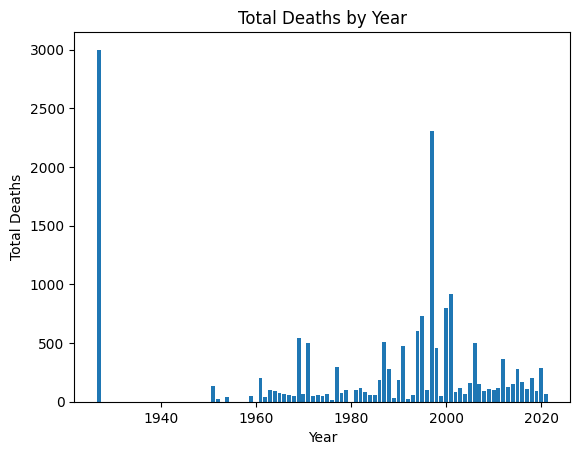

In [ ]:
plt.bar(flood_df['Year'], flood_df['Total Deaths'])
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.title('Total Deaths by Year')
plt.show()

In [ ]:
country_deaths = flood_df.groupby('Country')['Total Deaths'].sum().reset_index()

In [ ]:
top_countries = country_deaths.sort_values(by='Total Deaths', ascending=False).head(10)

In [ ]:
top_countries

,Country,Total Deaths
42,Somalia,14514
0,Algeria,11745
18,Ethiopia,8437
34,Mozambique,8029
24,Kenya,6927
37,Nigeria,6677
29,Malawi,6324
45,Sudan (the),5591
33,Morocco,5529
43,South Africa,4723


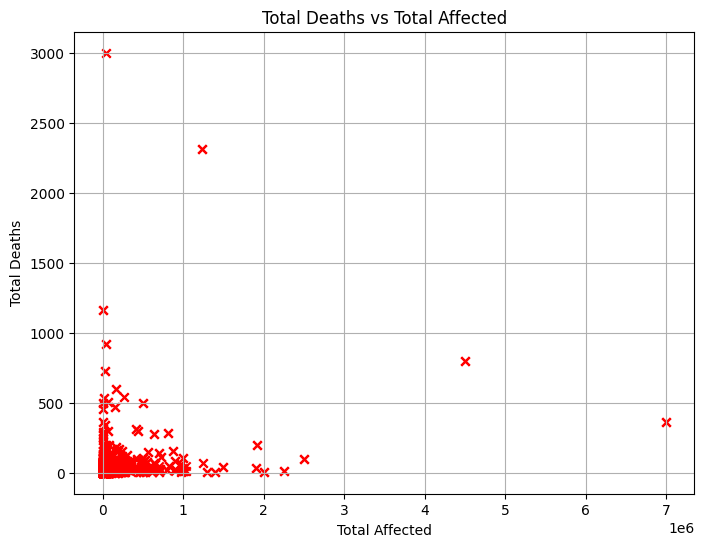

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(flood_df['Total Affected'], flood_df['Total Deaths'], color='r', marker='x')
plt.xlabel('Total Affected')
plt.ylabel('Total Deaths')
plt.title('Total Deaths vs Total Affected')
plt.grid(True)
plt.show()

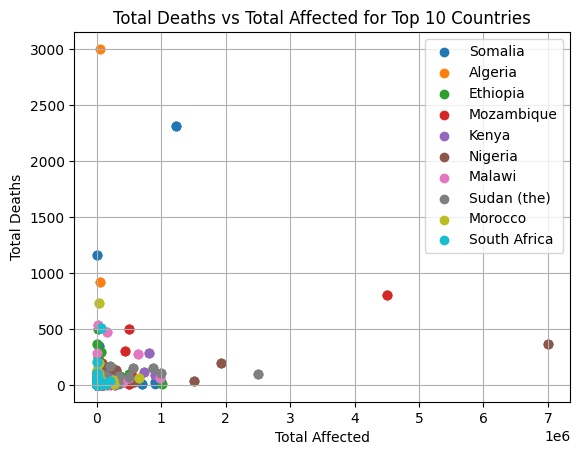

In [ ]:
for country in top_countries['Country']:
    country_data = flood_df[flood_df['Country'] == country]
    plt.scatter(country_data['Total Affected'], country_data['Total Deaths'], label=country, marker='o')

plt.xlabel('Total Affected')
plt.ylabel('Total Deaths')
plt.title('Total Deaths vs Total Affected for Top 10 Countries')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
#from tensorflow import keras
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from datetime import datetime

In [ ]:
 flood_df

,Year,Disaster Subtype,Country,Continent,Location,River Basin,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Start Date,End Date
0,1927,Flash Flood,Algeria,Africa,Mostaganem,None,1927,11.0,1,1927,11.0,1,3000,12,45400,15900,45400,1927-11-01,1927-11-01
1,1952,Flash Flood,Algeria,Africa,Not Recorded,None,1952,9.0,2,1952,9.0,2,25,12,45400,15900,45400,1952-09-02,1952-09-02
2,1954,Riverine flood,Egypt,Africa,Not Recorded,None,1954,3.0,4,1954,3.0,4,36,12,45400,15900,45400,1954-03-04,1954-03-04
3,1963,Flash Flood,Algeria,Africa,Southern,None,1963,12.0,5,1963,12.0,5,46,12,45400,15900,45400,1963-12-05,1963-12-05
4,1966,Flash Flood,Algeria,Africa,West El-Asnam,None,1966,10.0,6,1966,10.0,6,57,12,20000,15900,35912,1966-10-06,1966-10-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3378,2020,Flash Flood,Congo (the Democratic Republic of the),Africa,Djugu territory (Ituri province),None,2020,5.0,5,2020,5.0,5,42,69,500,17500,500,2020-05-05,2020-05-05
3379,2020,Flash Flood,Congo (the Democratic Republic of the),Africa,"Bukavu, Uvira (South Kivu)",Mulongwe river,2020,4.0,16,2020,5.0,18,52,80,92500,17500,92580,2020-04-16,2020-05-18
3380,2020,Flash Flood,Zambia,Africa,"Gwembe, Siavonga, Mambwe and Lumezi districts",None,2020,1.0,18,2020,1.0,22,52,80,1500,17500,1500,2020-01-18,2020-01-22
3381,2020,Flash Flood,Zambia,Africa,"Samfya, Mushindamo, Nakonde districts (Luapula...",None,2020,3.0,20,2020,3.0,26,52,80,700000,17500,700000,2020-03-20,2020-03-26


In [ ]:
label_encoder = LabelEncoder()
flood_df['Disaster Subtype'] = label_encoder.fit_transform(flood_df['Disaster Subtype'])
flood_df['Country'] = label_encoder.fit_transform(flood_df['Country'])
flood_df['Continent'] = label_encoder.fit_transform(flood_df['Continent'])
flood_df['Location'] = label_encoder.fit_transform(flood_df['Location'])
flood_df['River Basin'] = label_encoder.fit_transform(flood_df['River Basin'])

In [ ]:
flood_df['Start Year'] = flood_df['Start Date'].dt.year
flood_df['Start Month'] = flood_df['Start Date'].dt.month
flood_df['Start Day'] = flood_df['Start Date'].dt.day
flood_df['End Year'] = flood_df['End Date'].dt.year
flood_df['End Month'] = flood_df['End Date'].dt.month
flood_df['End Day'] = flood_df['End Date'].dt.day

In [ ]:
flood_df['Season'] = flood_df['Start Date'].dt.month.map({12: 'Dry', 1: 'Dry', 2: 'Dry', 3: 'Wet', 4: 'Wet', 5: 'Wet', 6: 'Dry', 7: 'Dry', 8: 'Dry', 9: 'Wet', 10: 'Wet', 11: 'Wet'})

In [ ]:
flood_df['Flood Duration'] = (flood_df['End Date'] - flood_df['Start Date']).dt.days

In [ ]:
flood_df['Total Affected Normalized'] = (flood_df['Total Affected'] - flood_df['Total Affected'].min()) / (flood_df['Total Affected'].max() - flood_df['Total Affected'].min())

In [ ]:
#encoding

In [ ]:
flood_data = flood_df.copy()

In [ ]:
#onehot_encoder = OneHotEncoder(sparse=False, drop='first')  # 'drop' removes one level to avoid multicollinearity
#encoded_columns = pd.DataFrame(onehot_encoder.fit_transform(flood_df[['Disaster Subtype', 'Country', 'Continent', 'Location', 'River Basin']]))

In [ ]:
#categorical_features = ['Country', 'Continent', 'Location', 'River Basin']
#onehot_encoder = OneHotEncoder(sparse=False, drop='first')
#encoded_columns = pd.DataFrame(onehot_encoder.fit_transform(flood_data[categorical_features]))
#flood_data_encoded = pd.concat([flood_data, encoded_columns], axis=1)
#flood_data_encoded = flood_data_encoded.drop(categorical_features, axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['Total Deaths', 'No Injured', 'No Affected', 'No Homeless', 'Total Affected', 'Flood Duration']
scaler = StandardScaler()
flood_data[numerical_features] = scaler.fit_transform(flood_data[numerical_features])

In [ ]:
flood_data.columns

Index(['Year', 'Disaster Subtype', 'Country', 'Continent', 'Location',
       'River Basin', 'Start Year', 'Start Month', 'Start Day', 'End Year',
       'End Month', 'End Day', 'Total Deaths', 'No Injured', 'No Affected',
       'No Homeless', 'Total Affected', 'Start Date', 'End Date', 'Season',
       'Flood Duration', 'Total Affected Normalized'],
      dtype='object')

In [ ]:
flood_data.head()

,Year,Disaster Subtype,Country,Continent,Location,River Basin,Start Year,Start Month,Start Day,End Year,...,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Start Date,End Date,Season,Flood Duration,Total Affected Normalized
0,1927,1,0,0,780,151,1927,11,1,1927,...,23.518253,-0.19385,-0.173824,-0.136104,-0.143032,1927-11-01,1927-11-01,Wet,-0.506977,0.006484
1,1952,1,0,0,884,151,1952,9,2,1952,...,-0.103326,-0.19385,-0.173824,-0.136104,-0.143032,1952-09-02,1952-09-02,Wet,-0.506977,0.006484
2,1954,3,16,0,884,151,1954,3,4,1954,...,-0.015986,-0.19385,-0.173824,-0.136104,-0.143032,1954-03-04,1954-03-04,Wet,-0.506977,0.006484
3,1963,1,0,0,1034,151,1963,12,5,1963,...,0.063415,-0.19385,-0.173824,-0.136104,-0.143032,1963-12-05,1963-12-05,Dry,-0.506977,0.006484
4,1966,1,0,0,1127,151,1966,10,6,1966,...,0.150755,-0.19385,-0.252452,-0.136104,-0.172173,1966-10-06,1966-10-06,Wet,-0.506977,0.005129


In [ ]:
X = flood_data[['Year', 'Country', 'Continent', 'Location', 'River Basin', 'Flood Duration']]
y = flood_data['Total Affected']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
Dt = DecisionTreeRegressor()
Dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
predictions_decision_tree = Dt.predict(X_test)
mse_decision_tree = mean_squared_error(y_test, predictions_decision_tree)
print(f"Decision Tree Mean Squared Error: {mse_decision_tree}")

Decision Tree Mean Squared Error: 0.21130175266235426


In [ ]:
Rf = RandomForestRegressor()
Rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
predictions = Rf.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.1048422102382894


In [ ]:
model_xgboost = XGBRegressor()
model_xgboost.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
predictions_xgboost = model_xgboost.predict(X_test)
mse_xgboost = mean_squared_error(y_test, predictions_xgboost)
print(f"XGBoost Mean Squared Error: {mse_xgboost}")

XGBoost Mean Squared Error: 0.025169439798689817


In [ ]:
def plot_actual_vs_predicted(actual, predicted, model_name):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=actual, y=predicted)
    plt.title(f"{model_name} - Actual vs. Predicted")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.show()

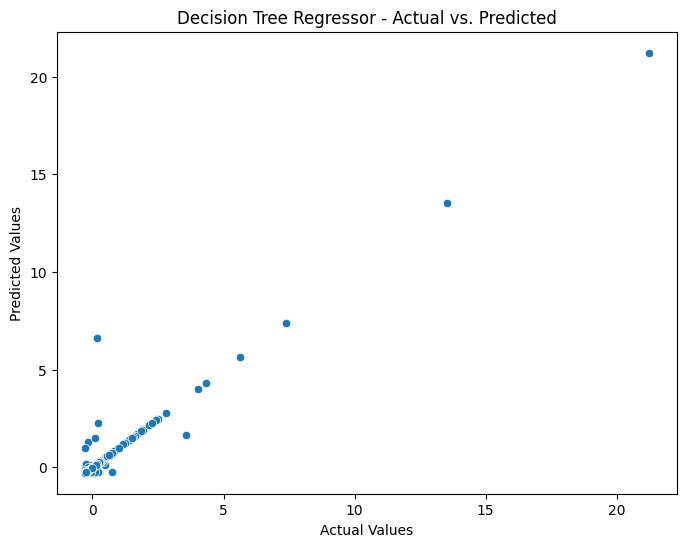

In [ ]:
#DT
plot_actual_vs_predicted(y_test, predictions_decision_tree, "Decision Tree Regressor")

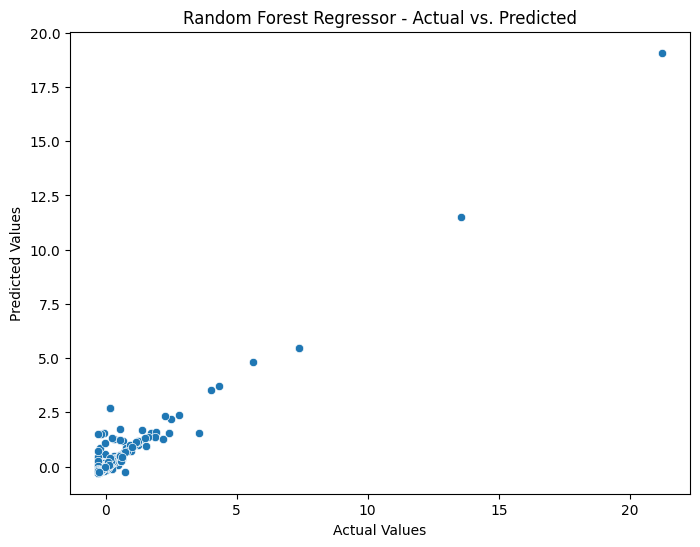

In [ ]:
#RF
plot_actual_vs_predicted(y_test, predictions, "Random Forest Regressor")


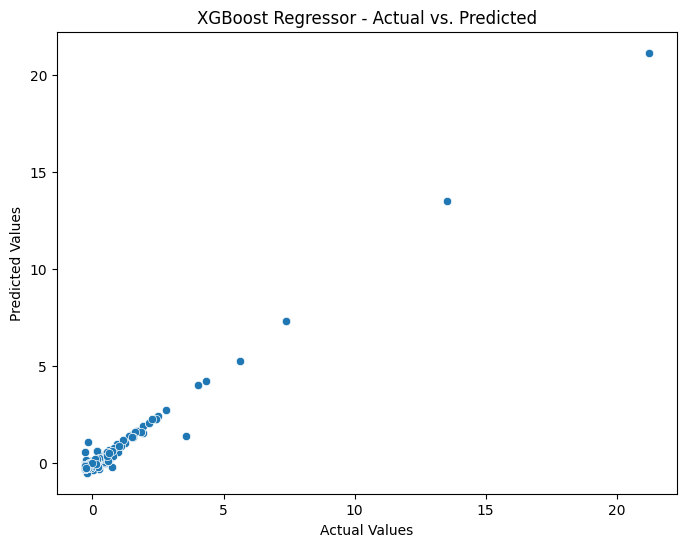

In [ ]:
plot_actual_vs_predicted(y_test, predictions_xgboost, "XGBoost Regressor")


In [ ]:
# Function for hyperparameter tuning using GridSearchCV
def tune_hyperparameters(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    return best_model

In [ ]:
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [ ]:
best_dt_model = tune_hyperparameters(DecisionTreeRegressor(), dt_param_grid, X_train, y_train)

In [ ]:
best_rf_model = tune_hyperparameters(RandomForestRegressor(), rf_param_grid, X_train, y_train)

In [ ]:
best_xgb_model = tune_hyperparameters(XGBRegressor(), xgb_param_grid, X_train, y_train)

In [ ]:
# checking for best models
best_dt_predictions = best_dt_model.predict(X_test)
best_rf_predictions = best_rf_model.predict(X_test)
best_xgb_predictions = best_xgb_model.predict(X_test)

In [ ]:
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

In [ ]:
print(f'R-squared: {r2:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')

R-squared: 0.9251
Mean Absolute Error: 0.1157
Root Mean Squared Error: 0.3238


In [ ]:
print("Decision Tree Regressor:")
evaluate_model(best_dt_model, X_test, y_test)
#print("\n")

Decision Tree Regressor:


In [ ]:
evaluate_model(best_dt_model, X_test, y_test)

In [ ]:
evaluate_model(best_rf_model, X_test, y_test)
#print("\n")

In [ ]:
# Evaluate XGBoost Regressor
print("XGBoost Regressor:")
evaluate_model(best_xgb_model, X_test, y_test)

XGBoost Regressor:


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import joblib

In [ ]:
numeric_features = ['Year', 'Flood Duration']
categorical_features = ['Country', 'Continent', 'Location', 'River Basin']

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
Rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=101))  # You can adjust hyperparameters
])

In [ ]:
#rf_model = Pipeline(steps=[
#    ('preprocessor', preprocessor),
 #   ('regressor', RandomForestRegressor(n_estimators=100, random_state=101))  # You can adjust hyperparameters
#])

In [ ]:
#rf_model.fit(X_train, y_train)

In [ ]:
joblib.dump(Rf, 'random_forest_model.joblib')


['random_forest_model.joblib']

In [ ]:
from flask import Flask, request, jsonify
import joblib
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

app = Flask(__name__)

# Load the trained model
model = joblib.load('random_forest_model.joblib')

# Assuming you have a preprocessor defined
# Note: The preprocessor should match the one used during training
preprocessor = ...  # Your preprocessor here

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get data from the request
        data = request.json

        # Create a DataFrame from the received data
        input_data = pd.DataFrame([data])

        # Preprocess the data
        processed_data = preprocessor.transform(input_data)

        # Make a prediction
        prediction = model.predict(processed_data)

        # Prepare the response
        response = {'prediction': prediction.tolist()}

        return jsonify(response)

    except Exception as e:
        return jsonify({'error': str(e)})

if __name__ == '__main__':
    app.run(port=5000)


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


In [ ]:

import streamlit as st
import joblib


model = joblib.load('random_forest_model.joblib')

# Streamlit UI
st.title('FloodSafety Prediction App')
user_input = st.text_input('Flood Chat Model')

if st.button('Predict'):
    prediction = Rf.predict([user_input])
    st.write(f'Prediction: {prediction}')
